Task 1. 
First, compute the probabilities of obtaining x ”heads” out of
30 coin flips using a fair coin (i.e. probability of ”heads”= 0.5), where
x = 0, ..., 30. Then plot the probabilities p(x) against x. What is the
probability of observing 20 or more heads? If you use p ≤ 0.05 as a
threshold to reject a null hypothesis, H0 =”the coin is fair” against alterative hypothesis HA=”the coin is not fair”, i.e. probability of heads̸= 0.5, how many heads do you need to observe to reject the null hypothesis? 
Hints: 
-Remember that x=0,...,30, don’t forget x=0! Take x=0 into account in the indexing.
-The alternative hypothesis is two-sided, so the null hypothesis can be rejected with low OR
high values!
-The distribution is symmetric.


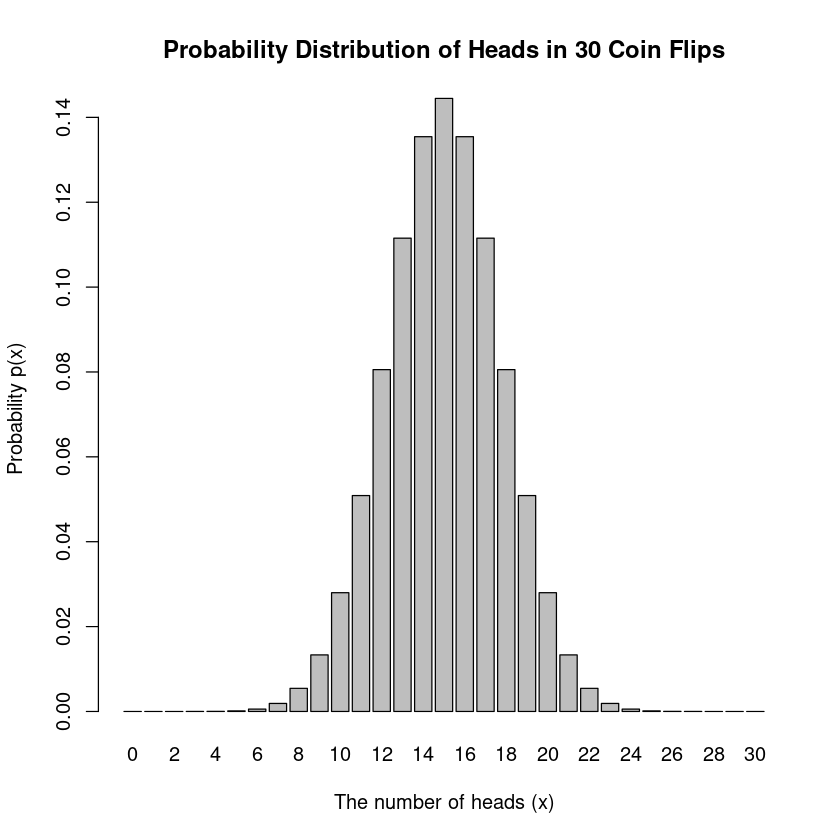

In [2]:
n <- 30
p_heads = 0.5
probs <- dbinom(0:n, size = n, prob = p_heads)

#png(file = "probs.png", width = 800, height = 600)
barplot(probs, names.arg = 0:n, xlab = "The number of heads (x)", ylab = "Probability p(x)", main = "Probability Distribution of Heads in 30 Coin Flips")
#dev.off()

In [13]:
# Probability of observing 20 or more heads
p_heads_20 <- sum(probs[21:31])
cat("Probability of observing 20 or more heads:",p_heads_20)

Probability of observing 20 or more heads: 0.04936857

In [14]:
# H0 =”the coin is fair” 
# HA=”the coin is not fair”
# How many heads needed for rejecting null hypothesis with  p ≤ 0.05 threshold

left_tail <- qbinom(0.025, size = n, prob = p_heads, lower.tail =TRUE)
right_tail <- qbinom(0.975, size = n, prob = p_heads, lower.tail =TRUE)
cat("left_tail value:", left_tail, "\n")
cat("right_tail value:", right_tail, "\n")
cat("To reject the null hypothesis the number of heads needed is:", left_tail, "> x, or x >", right_tail)

left_tail value: 10 
right_tail value: 20 
To reject the null hypothesis the number of heads needed is: 10 > x, or x > 20

Task 2. Hypothesis testing using t-test and multiple correction. 

In [15]:
# 2. a) Generate normally distributed expression data for 100 genes for two groups A and B with 8 replicates for each group, where
# µA = µB = 0 and σa^2 = σb^2 = 3

set.seed(0511)

ngenes <- 100
nrep <- 8
mean = 0
var = 3
std <- sqrt(var)

A <- matrix(rnorm(ngenes * nrep, mean = mean, sd = std), nrow = ngenes, ncol=nrep)
B <- matrix(rnorm(ngenes * nrep, mean = mean, sd = std), nrow = ngenes, ncol=nrep)

Number of genes that have p ≤ 0.05: 7

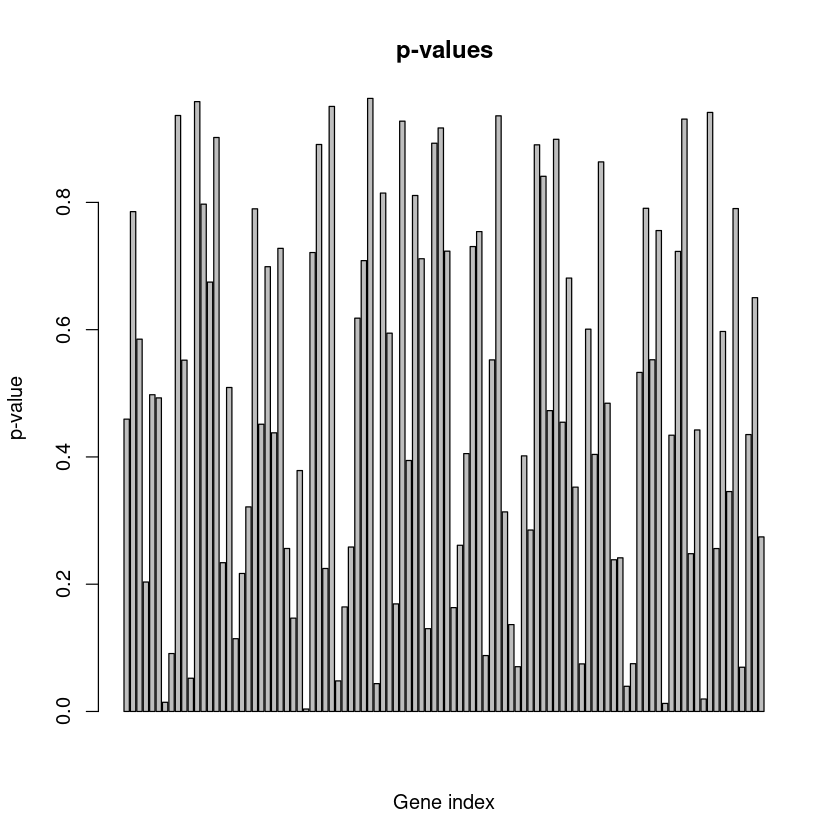

In [16]:
# b) For each gene, test the null hypothesis, H0 : µA = µB, using t-test when alternative hypothesis is HA : µA ̸= µB 
# and plot the p-values in a histogram. How many genes have p ≤ 0.05?
p <- numeric(ngenes)

# t - test (compare means)
for(i in 1:ngenes) {
    t_result <- t.test(A[i, ], B[i, ], var.equal = TRUE)
    p[i] <- t_result$p.value
}

# Plot p-values
#hist(p, main = "p-values", xlab = "p-value", breaks = 100)
#png(file = "pvals.png", width = 800, height = 600)
barplot(p, main = "p-values", xlab = "Gene index", ylab = "p-value")
#dev.off()

# p <= 0.05
p_005 <- sum(p <= 0.05)
cat("Number of genes that have p ≤ 0.05:", p_005)


In [17]:
length(p)

[1] 100

In [18]:
# 2 c) Implement the Bonferroni method for adjusting p-values for multiple testing.
# -The idea in Bonferroni correction: multiply the original p-values with the total number of
# p-values to be adjusted, find minimum of that and 1
# -You can compare the results from your implementation to p.adjust(.., method=”bonferroni”)

bonferroni <- function(p, n) {
  p_corrected <- pmin(1, p * n)
  return(p_corrected)
}
# bonferroni function
p_bonf <- bonferroni(p, ngenes)

# p.adjust
p_bonf_R <- p.adjust(p, method = "bonferroni")

# compare
identical(p_bonf, p_bonf_R) 

[1] TRUE

In [19]:
p_bonf

[1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
  [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [29] 0.3815009 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [50] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [57] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [64] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [71] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [78] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [85] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [92] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [99] 1.0000000 1.0000000

In [27]:
p_bonf_R

[1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
  [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [29] 0.3815009 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [50] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [57] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [64] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [71] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [78] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [85] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [92] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [99] 1.0000000 1.0000000

In [24]:
head(p)

[1] 0.4594068 0.7854770 0.5850630 0.2034205 0.4977549 0.4927942

In [20]:
#Same as (c), but implement the Benjamini-Hochberg method. Adjust
#the p-values using your implementation. How many genes have adjusted p ≤ 0.05? Comment on differences with uncorrected p-values, if any.

# The steps in B-H correction:
    # 1. order the p-values from smallest to largest
    # 2. store the original order of the p-values
    # 3. calculate the q_k values
    # 4. make sure that the corrected values do not decrease when k increases
    # 5. return the corrected p-values (make sure they are <=1) in their original order

# Benjamini-Hochberg correction
bh_correction <- function(p, alpha = 0.05) {
    m <- length(p)
    p_order <- order(p)
    p_ordered <- p[p_order]
    p_adjusted_ordered <- numeric(m)
    
    # adjusted p-values
    p_adjusted_ordered[m] <- p_ordered[m]
    for (i in (m-1):1) {
        # p_ordered[i] * m / i - calculate adjusted p-value
        # p_adjusted_ordered[i+1] - compare to next to make sure its not decreasing
        p_adjusted_ordered[i] <- min(p_ordered[i] * m / i, p_adjusted_ordered[i+1])
    }
    
    # return the corrected p-values (make sure they are <=1) in their original order
    p_adjusted <- p_adjusted_ordered[order(p_order)]
    p_adjusted <- pmin(p_adjusted, 1)
    return(p_adjusted)
}


# Benjamini-Hochberg function
p_bh_f <- bh_correction(p)

# R BH function
p_bh_R <- p.adjust(p, method = "BH")

identical(round(p_bh_f, 10), round(p_bh_R, 10))  

# Count how many genes have adjusted p <= 0.05 using the built-in adjustment
significant_genes <- sum(p_bh_f <= 0.05)

cat("Number of genes that have corrected p <= 0.05:", significant_genes)



[1] TRUE

Number of genes that have adjusted p <= 0.05: 0

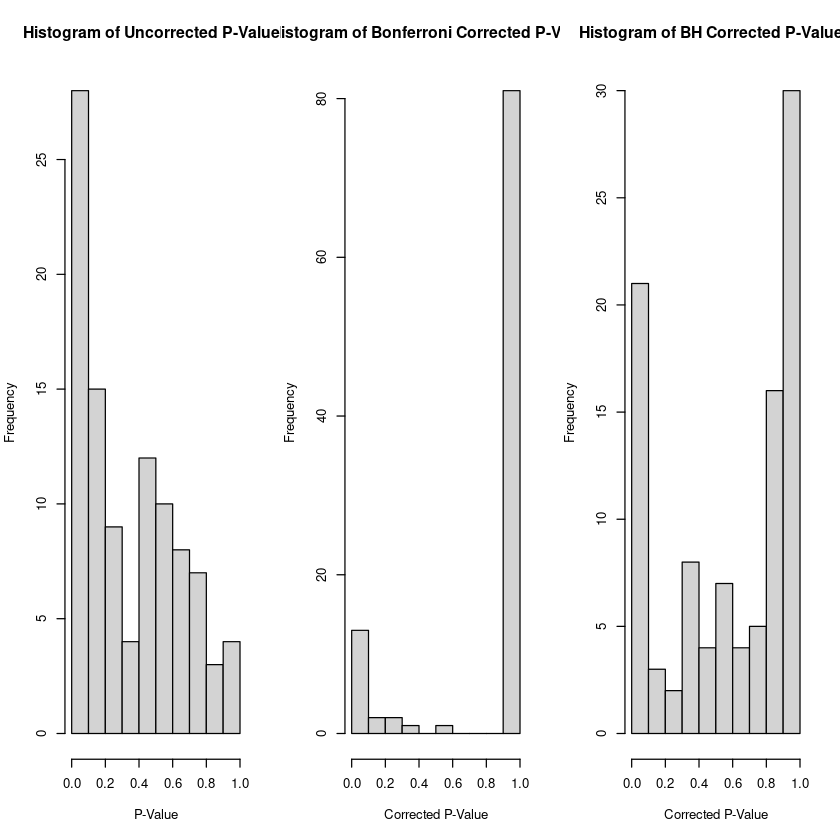

In [87]:
library(ggplot2)

#png("combined_pval_histograms.png", width = 600, height = 300)
par(mfrow=c(1, 3))  # Set up the plotting area for 1 row and 3 columns
hist(p, main="Histogram of Uncorrected P-Values", xlab="P-Value")
hist(p_bonf, main="Histogram of Bonferroni Corrected P-Values", xlab="Corrected P-Value")
hist(p_bh, main="Histogram of BH Corrected P-Values", xlab="Corrected P-Value")

#dev.off() 


In [ ]:
p_bh_f

In [ ]:
p_bh_R

In [21]:
# Task 2. e) 
# Generate expression values for 80 genes for groups A and B, where µA = µB = 0 and σ 2A = σ2B = 3 with 8 replicates for each group.
# Generate similar expression values for 20 genes but with µA = 0, µB = 4 and σ2A = σ2 B = 3.
# -20 rows with mu_a =/= mu_b
# -80 rows with mu_a=mu_b

nrep <- 8
mean = 0
var = 3
std <- sqrt(var)

A_80 <- matrix(rnorm(80 * nrep, mean = 0, sd = std), nrow = 80, ncol=nrep)
B_80 <- matrix(rnorm(80 * nrep, mean = 0, sd = std), nrow = 80, ncol=nrep)

A_20 <- matrix(rnorm(20 * nrep, mean = 0, sd = std), nrow = 20, ncol=nrep)
B_20 <- matrix(rnorm(20 * nrep, mean = 4, sd = std), nrow = 20, ncol=nrep)

A <- rbind(A_80, A_20)
B <- rbind(B_80, B_20)

In [22]:
# 2 f)
# For each gene, test the null hypothesis, H0 : µA = µB, using t-test,when alternative hypothesis is HA : µA ̸= µB and when alternative
# hypothesis is HA : µA < µB. How many genes have p ≤ 0.05? Use var.equal=TRUE argument with t.test function. Correct the p-values
# for multiple testing using your implementation of both methods. How many genes have adjusted p ≤ 0.05? Comment on differences, if any.

p_twosided <- numeric(100)
p_onesided <- numeric(100)

# t - test (compare means)
for(i in 1:100) {
    t_result1 <- t.test(A[i, ], B[i, ], alternative = "two.sided", var.equal = TRUE)
    t_result2 <- t.test(A[i, ], B[i, ], alternative = "less", var.equal = TRUE)
    p_twosided[i] <- t_result1$p.value
    p_onesided[i] <- t_result2$p.value
}

p_bonf_twosided <- bonferroni(p_twosided, 100)
p_bh_twosided <- bh_correction(p_twosided)
significant_genes_bonf_twosided <- sum(p_bonf_twosided <= 0.05)
significant_genes_bh_twosided <- sum(p_bh_twosided <= 0.05)

p_bonf_onesided <- bonferroni(p_onesided, 100)
p_bh_onesided <- bh_correction(p_onesided)
significant_genes_bonf_onesided <- sum(p_bonf_onesided <= 0.05)
significant_genes_bh_onesided <- sum(p_bh_onesided <= 0.05)

cat("Significant genes twosided:", "\n")
cat("Bonferroni corrected:",significant_genes_bonf_twosided,"\n")
cat("Benjamini-Hochberg:", significant_genes_bh_twosided, "\n")
cat("\n")

cat("Significant genes onesided:", "\n")
cat("Bonferroni corrected:",significant_genes_bonf_onesided, "\n")
cat("Benjamini-Hochberg:", significant_genes_bh_onesided)

Significant genes twosided: 
Bonferroni corrected: 11 
Benjamini-Hochberg: 19 

Significant genes onesided: 
Bonferroni corrected: 14 
Benjamini-Hochberg: 23

In [24]:
# 2 g) As in point (f), for each gene, test the null hypothesis, H0 : µA = µB,using t-test, when alternative hypothesis is HA : µA ̸= µB. Correct
# the p-values for multiple testing using your implementation of both methods. Empirically estimate the false discovery rate (FDR) for
# both methods. Similarly, for both methods check whether you have made at least one false discovery (recall the definition of family-wise
# error rate FWER). Repeat this analysis for 100 (or more) randomly generated datasets and report you average FDR and FWER values.
# Are your average FDR and FWER values close to what they should be?

set.seed(0511)

ngenes <- 100
nrep <- 8
ndatasets <- 100
mean = 0
var = 3
std <- sqrt(var)
diff_expressed <- 20 
fdr_bonf <- 0
fdr_bh <- 0
fwer_bonf <- 0 
fwer_bh <- 0


for (i in 1:100) {

    A_80 <- matrix(rnorm(80 * nrep, mean = 0, sd = std), nrow = 80, ncol=nrep)
    B_80 <- matrix(rnorm(80 * nrep, mean = 0, sd = std), nrow = 80, ncol=nrep)
    A_20 <- matrix(rnorm(20 * nrep, mean = 0, sd = std), nrow = 20, ncol=nrep)
    B_20 <- matrix(rnorm(20 * nrep, mean = 4, sd = std), nrow = 20, ncol=nrep)
    A <- rbind(A_20, A_80)
    B <- rbind(B_20, B_80)

    p_values <- numeric(ngenes)

    # t-test
    for (i in 1:ngenes) {
        t_test_result <- t.test(A[i, ], B[i, ], var.equal = TRUE)
        p_values[i] <- t_test_result$p.value
    }
     p_values <- sapply(1:ngenes, function(i) t.test(A[i, ], B[i, ], var.equal = TRUE)$p.value)

    # Bonf and BH corrections
    #p_bonf <- p.adjust(p_values, method = "bonferroni")
    #p_bh <- p.adjust(p_values, method = "BH")
    p_bonf <- bonferroni(p_values, ngenes)
    p_bh <- bh_correction(p_values)

    # FDR and FWER, Bonferroni
    false_positives_bonf <- sum(p_bonf <= 0.05 & (1:ngenes) > (ngenes - diff_expressed))
    total_positives_bonf <- sum(p_bonf <= 0.05)
    #cat("Bonf false", false_positives_bonf, "tot", total_positives_bonf, "\n")
    fdr_bonf <- fdr_bonf + ifelse(total_positives_bonf > 0, false_positives_bonf / total_positives_bonf, 0)
    fwer_bonf <- fwer_bonf + (false_positives_bonf > 0)
    


    # FDR and FWER, BH
    false_positives_bh <- sum(p_bh <= 0.05 & (1:ngenes) > (ngenes - diff_expressed))
    total_positives_bh <- sum(p_bh <= 0.05)
    #cat(" BH false", false_positives_bh, "tot", total_positives_bh, "\n")
    fdr_bh <- fdr_bh + ifelse(total_positives_bh > 0, false_positives_bh / total_positives_bh, 0)
    fwer_bh <- fwer_bh + (false_positives_bh > 0)
    

}

# Average FDR and FWER
avg_fdr_bonf <- fdr_bonf / ndatasets
avg_fdr_bh <- fdr_bh / ndatasets
avg_fwer_bonf <- fwer_bonf / ndatasets
avg_fwer_bh <- fwer_bh / ndatasets

cat("Average FDR (Bonferroni):", avg_fdr_bonf, "\n")
cat("Average FDR (BH):", avg_fdr_bh, "\n")
cat("Average FWER (Bonferroni):", avg_fwer_bonf, "\n")
cat("Average FWER (BH):", avg_fwer_bh, "\n")

Average FDR (Bonferroni): 0.000625 
Average FDR (BH): 0.01066587 
Average FWER (Bonferroni): 0.01 
Average FWER (BH): 0.21 


In [74]:
fdr_bh
fwer_bh 
fdr_bonf
fwer_bonf

[1] 1.066587

[1] 21

[1] 0.0625

[1] 1